In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preview the data
print("Train Data:")
display(train_df.head())

print("\nTest Data:")
display(test_df.head())


Train Data:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0



Test Data:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [2]:
#Data Size – Run this to see how many rows you’re working with:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (576, 12)
Test shape: (120, 12)


In [3]:
#Check for missing values

print("Missing values in Train:")
print(train_df.isnull().sum())

print("\nMissing values in Test:")
print(test_df.isnull().sum())

Missing values in Train:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

Missing values in Test:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [34]:
print("Unique values in each column:")
print(train_df.nunique())


Unique values in each column:
profile pic               2
nums/length username     54
fullname words            9
nums/length fullname     25
name==username            2
description length      104
external URL              2
private                   2
#posts                  193
#followers              372
#follows                400
fake                      2
dtype: int64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt  # Also good to import alongside


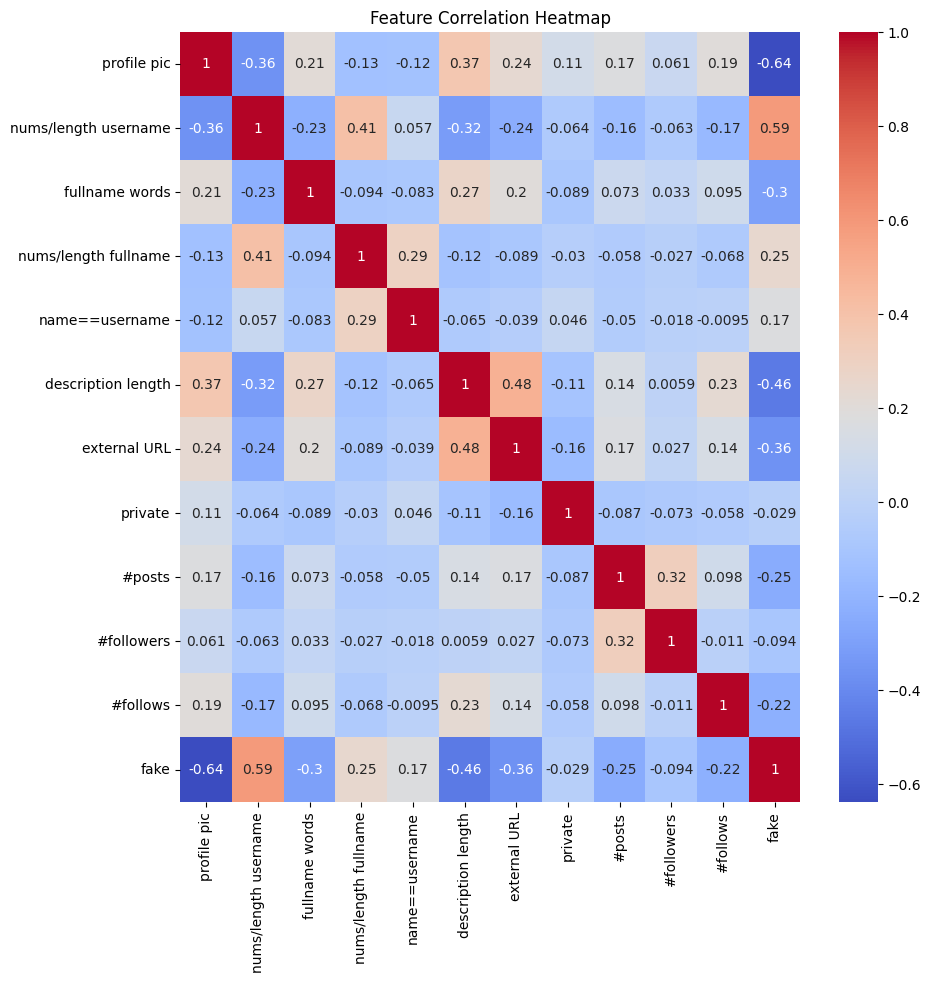

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


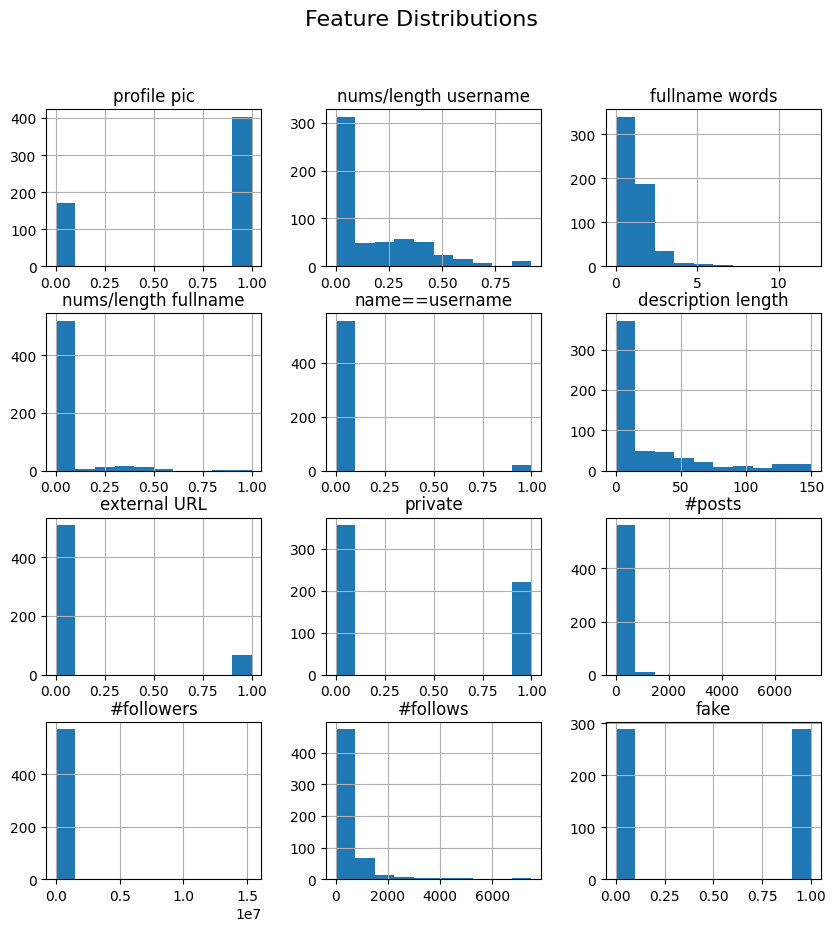

In [36]:
train_df.hist(figsize=(10,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


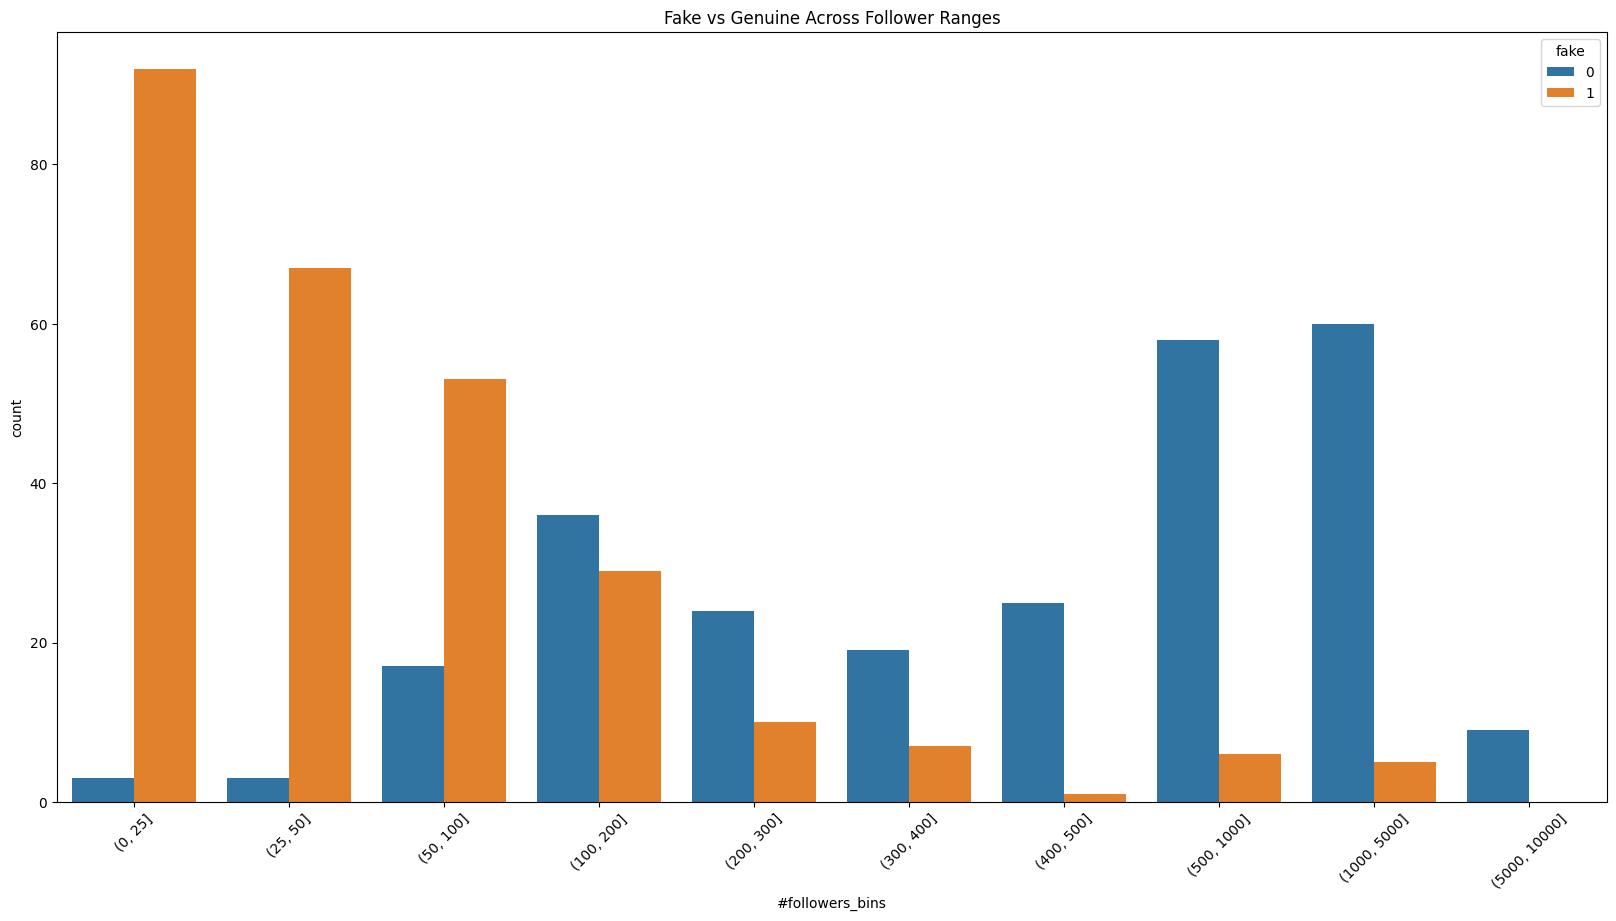

In [39]:
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
train_df['#followers_bins'] = pd.cut(train_df['#followers'], bins=bins)

plt.figure(figsize=(20,10))
sns.countplot(x='#followers_bins', hue='fake', data=train_df)
plt.title("Fake vs Genuine Across Follower Ranges")
plt.xticks(rotation=45)
plt.show()


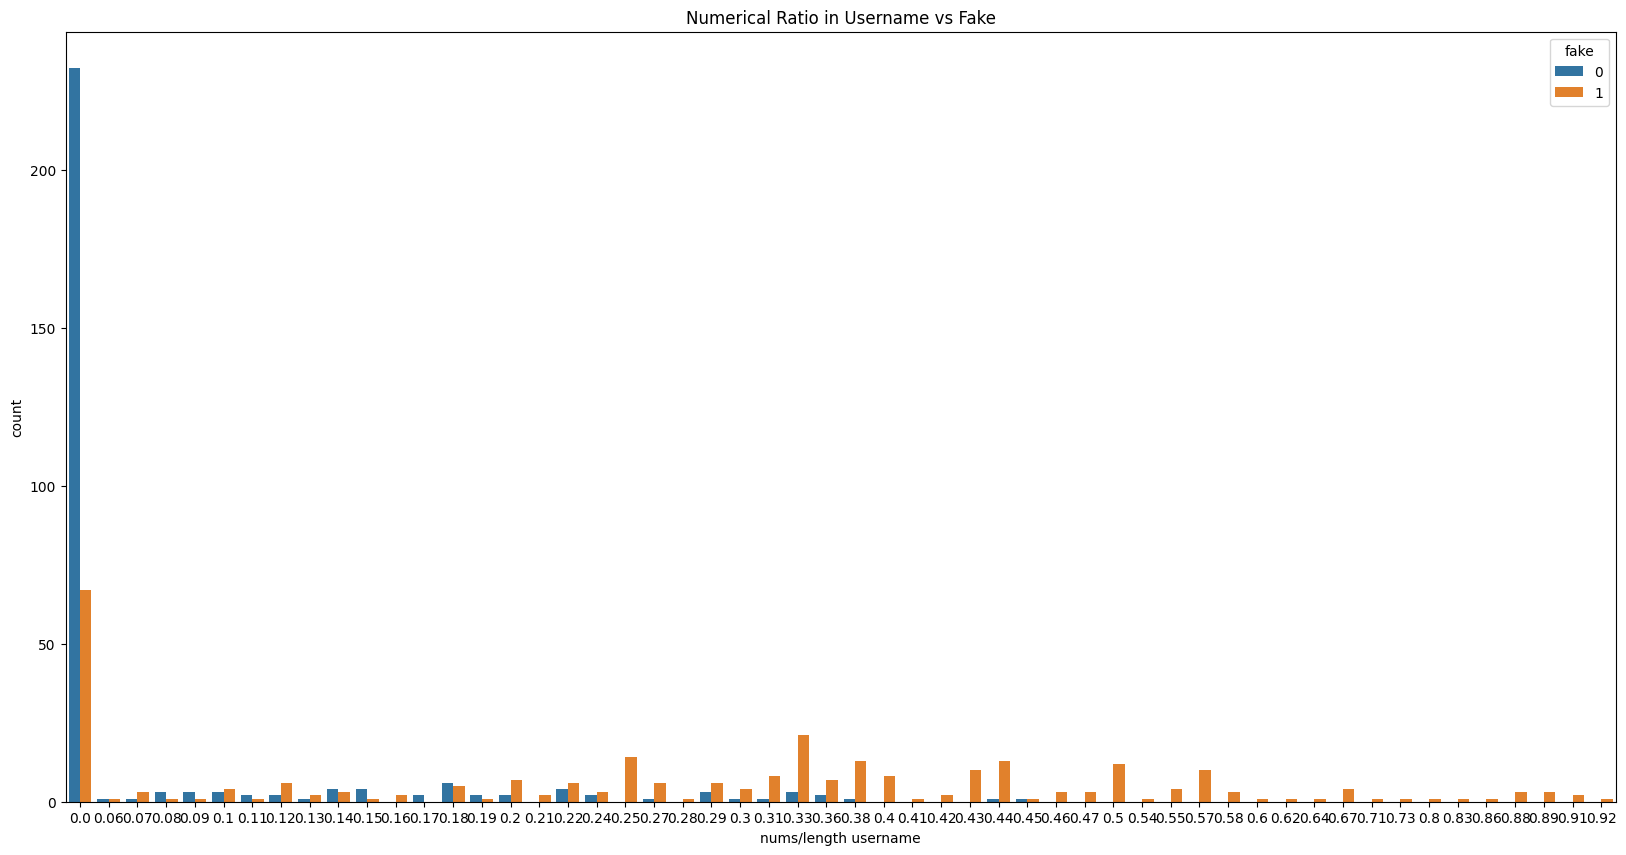

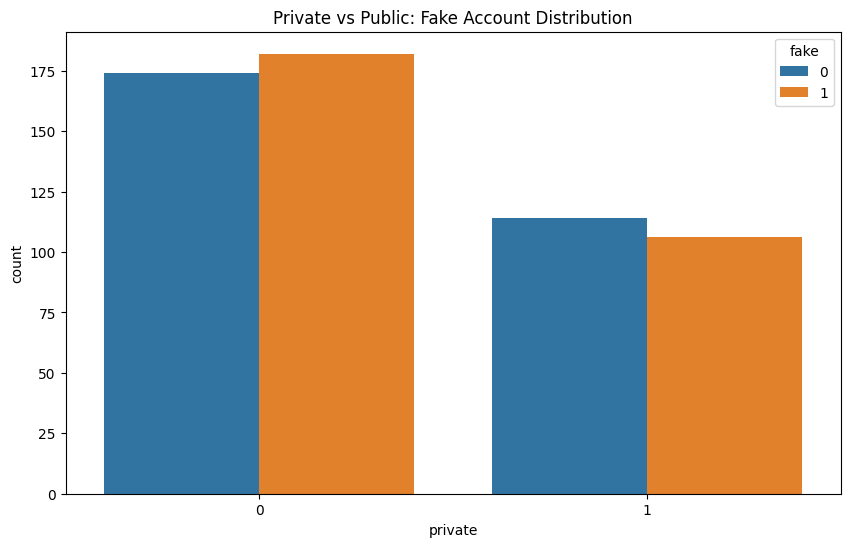

In [40]:
# Countplot for numeric username ratio
plt.figure(figsize=(20,10))
sns.countplot(x='nums/length username', hue='fake', data=train_df)
plt.title("Numerical Ratio in Username vs Fake")
plt.show()

# Countplot for private vs fake
plt.figure(figsize=(10,6))
sns.countplot(x='private', hue='fake', data=train_df)
plt.title("Private vs Public: Fake Account Distribution")
plt.show()


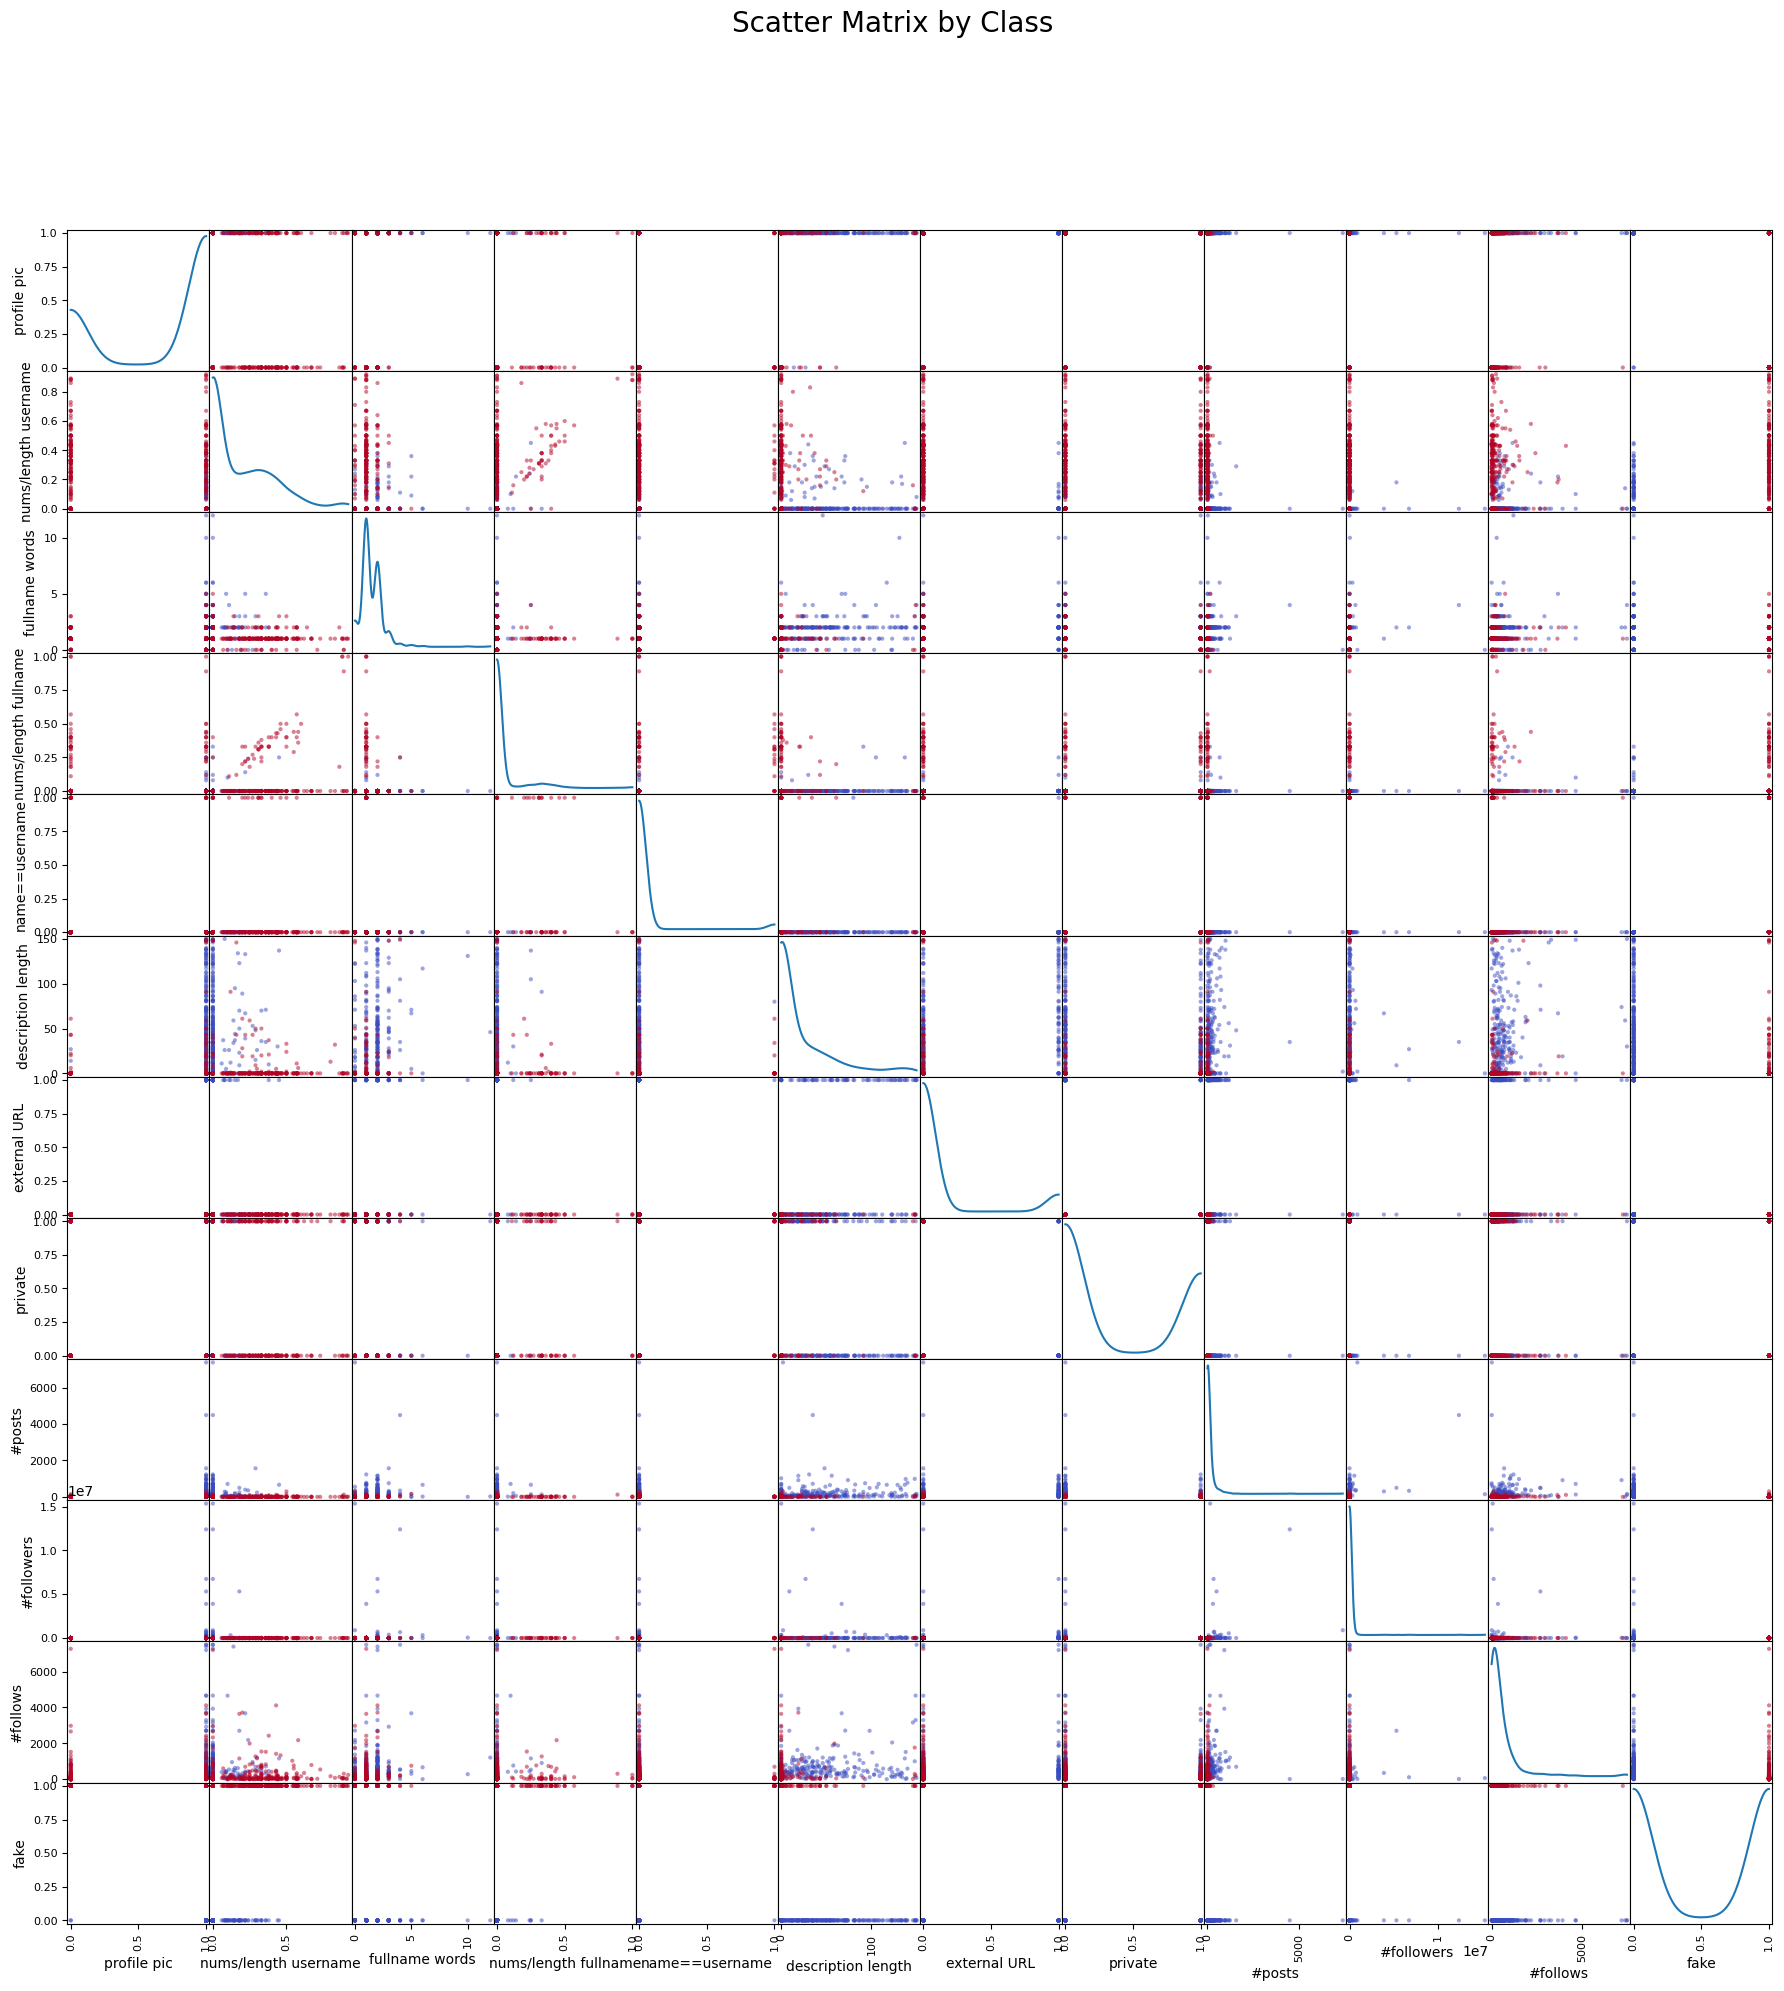

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df, figsize=(22,22), diagonal='kde', c=train_df['fake'], cmap='coolwarm')
plt.suptitle("Scatter Matrix by Class", fontsize=20)
plt.show()


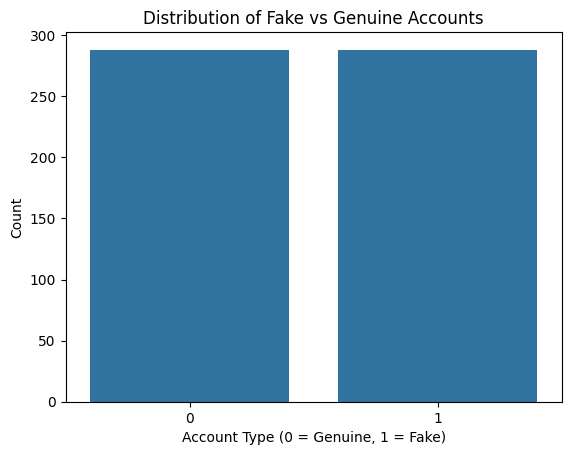

,count
fake,
0,288
1,288


In [38]:
# 📊 Visualizing the class distribution in the training data

# Create a countplot to see how many fake vs genuine accounts are in the dataset
sns.countplot(x='fake', data=train_df)

# Add a title and axis labels for clarity
plt.title('Distribution of Fake vs Genuine Accounts')
plt.xlabel('Account Type (0 = Genuine, 1 = Fake)')
plt.ylabel('Count')

# Display the plot
plt.show()

# 🔢 Show the actual count of each class
# This tells us how many accounts are labeled fake (1) vs genuine (0)
train_df['fake'].value_counts()


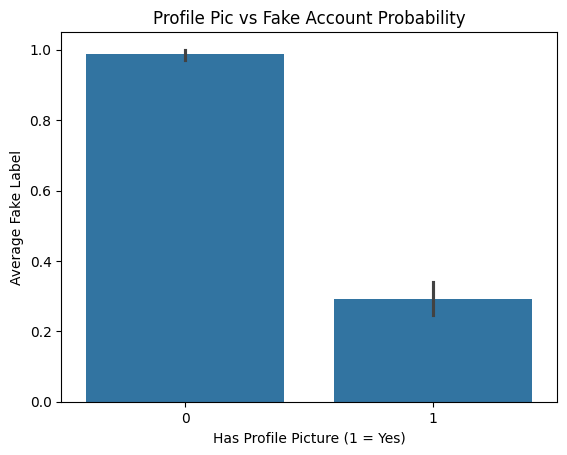

In [6]:
#1. Profile Picture vs Fake Probability

sns.barplot(x='profile pic', y='fake', data=train_df)
plt.title('Profile Pic vs Fake Account Probability')
plt.xlabel('Has Profile Picture (1 = Yes)')
plt.ylabel('Average Fake Label')
plt.show()

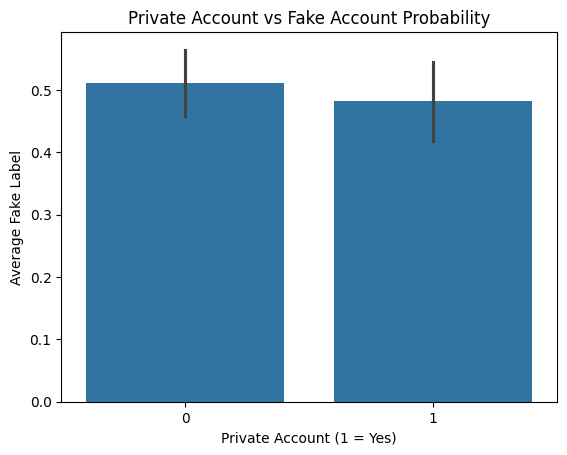

In [7]:
#2. Private vs Fake Accounts
sns.barplot(x='private', y='fake', data=train_df)
plt.title('Private Account vs Fake Account Probability')
plt.xlabel('Private Account (1 = Yes)')
plt.ylabel('Average Fake Label')
plt.show()

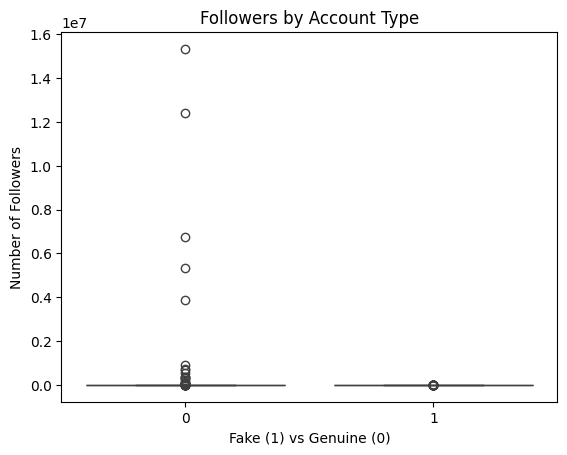

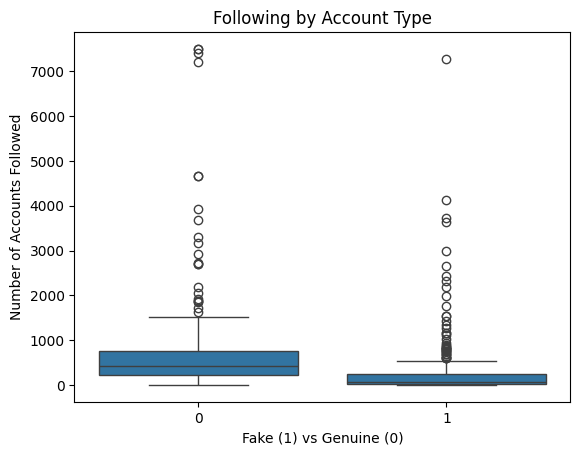

In [8]:
#3. Boxplots for Followers & Following

sns.boxplot(x='fake', y='#followers', data=train_df)
plt.title('Followers by Account Type')
plt.xlabel('Fake (1) vs Genuine (0)')
plt.ylabel('Number of Followers')
plt.show()

sns.boxplot(x='fake', y='#follows', data=train_df)
plt.title('Following by Account Type')
plt.xlabel('Fake (1) vs Genuine (0)')
plt.ylabel('Number of Accounts Followed')
plt.show()

In [9]:
# 📝 INTERPRETATION OF EDA RESULTS

# 📷 1. Profile Picture vs Fake Account Probability
# Observation: Accounts without profile pictures had a higher average fake label.
# 💡 Insight: Accounts lacking profile pictures are more likely to be fake or spam.
# This suggests that profile picture presence is a key signal for account authenticity.

# 🔒 2. Private Account vs Fake Account
# Observation: Public accounts (private=0) had a slightly higher average fake label.
# 💡 Insight: Public accounts are slightly more associated with fake behavior.
# Fake/spam accounts may prefer being public to maximize visibility.

# 👥 3. Followers vs Fake Accounts
# Observation: Genuine accounts (fake=0) had tighter clustering around 0–200 followers,
# while fake accounts showed scattered and unusually high follower counts.
# 💡 Insight: Genuine users tend to have modest, realistic follower counts.
# Fake accounts may artificially inflate followers, leading to inconsistent patterns.

# ➕ 4. Following vs Fake Accounts
# Observation: Fake accounts (fake=1) mostly followed fewer than 1000 users,
# while genuine accounts (fake=0) often followed more than 1500 users.
# 💡 Insight: Fake accounts follow many users, possibly to appear active,
# but rarely cross 1000. Genuine users may show broader, organic interactions.


In [10]:
#Step 3: Model Building – Let’s Predict Fake Accounts!

In [12]:
# 📦 Importing necessary modules from scikit-learn (sklearn)

# ✅ For splitting the data into training and validation sets
from sklearn.model_selection import train_test_split

# ✅ Logistic Regression model – a simple and effective classifier
from sklearn.linear_model import LogisticRegression

# ✅ Metrics to evaluate model performance:
# - accuracy_score: how many predictions were correct
# - confusion_matrix: shows correct vs incorrect predictions for each class
# - classification_report: includes precision, recall, f1-score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
# Split into features (X) and target (y)
X = train_df.drop('fake', axis=1)  # all columns except 'fake'
y = train_df['fake']              # target column


In [14]:
# Split training data into train and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# 🧪 STEP: Feature Scaling + More Iterations for Logistic Regression

# ✅ Import the scaler
from sklearn.preprocessing import StandardScaler

# ✅ Scale the features (X only)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Split scaled features and original labels into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Import and initialize Logistic Regression with increased max_iter
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increasing max iterations helps the solver converge

# ✅ Train the model
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_val)


In [27]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8620689655172413
Confusion Matrix:
 [[60  3]
 [13 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.93      0.75      0.83        53

    accuracy                           0.86       116
   macro avg       0.88      0.85      0.86       116
weighted avg       0.87      0.86      0.86       116



🔍 Interpretation:
Precision for Fake (1): 0.93 → When the model says “this is fake,” it’s right 93% of the time — excellent!

Recall for Fake (1): 0.75 → It caught 75% of actual fake accounts, but missed a few.

F1-score: 0.83 → Balanced measure — shows strong overall performance.

In [28]:
# Step 4: Predict on the test.csv Dataset

In [29]:
# Drop the target column 'fake' from test data if it's present (sometimes it's hidden label info)
X_test = test_df.drop('fake', axis=1)


In [30]:
#2. Scale the test data using the SAME scaler you used before:
X_test_scaled = scaler.transform(X_test)


In [31]:
#3. Make predictions
test_predictions = model.predict(X_test_scaled)

In [32]:
print(test_predictions)


[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1]


🎯 Decision Tree Accuracy: 0.8706896551724138

📊 Confusion Matrix:
 [[57  6]
 [ 9 44]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


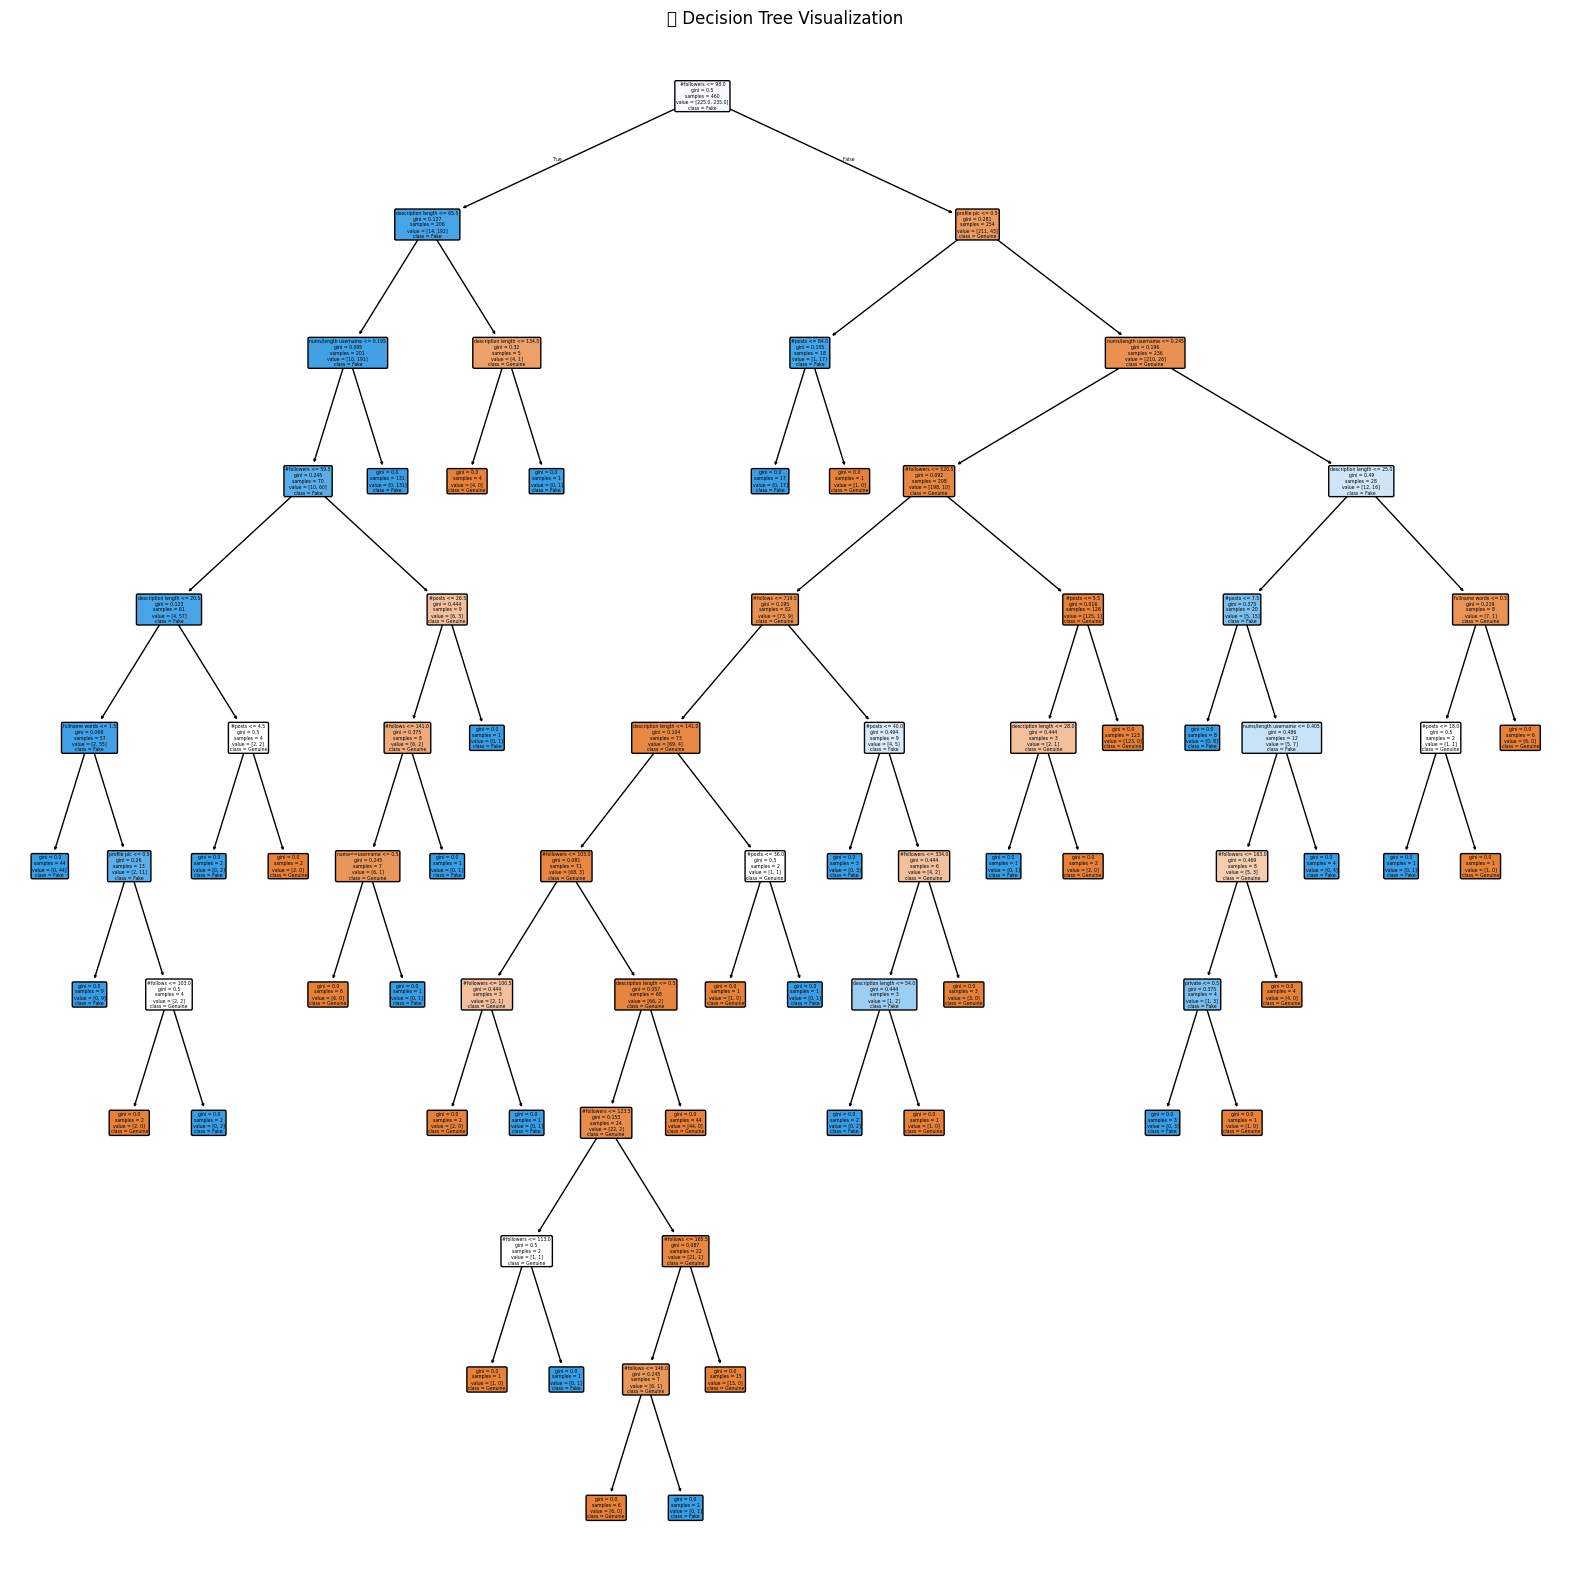

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


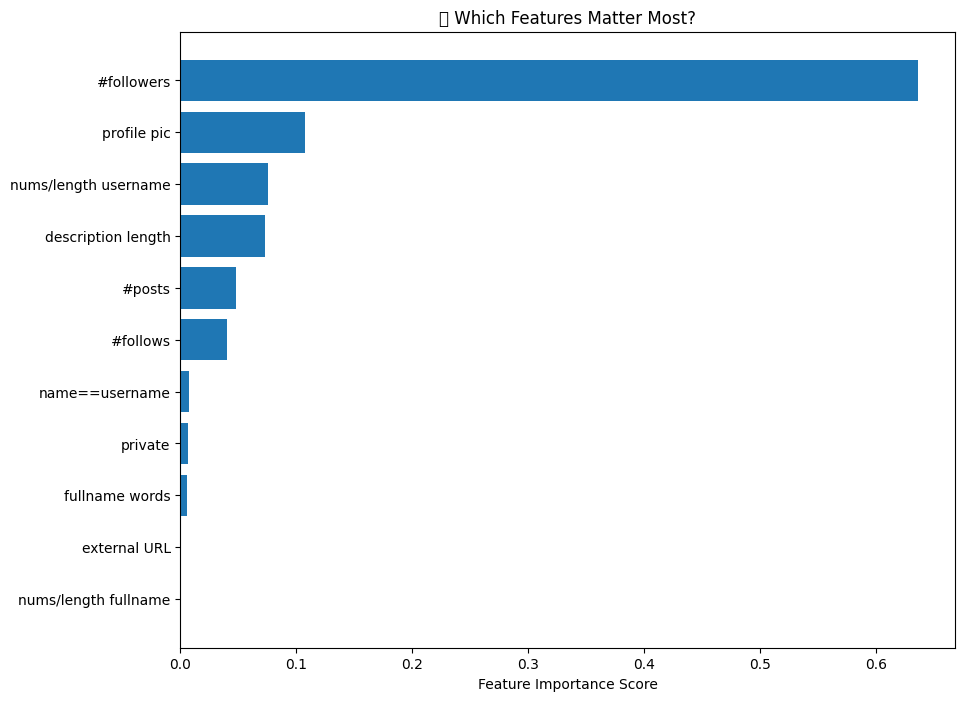

In [8]:
import pandas as pd

# Reload your dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 🌳 Decision Tree Classifier Pipeline

# ✅ Step 1: Import all needed libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 2: Prepare the data
# (remove #followers_bins ONLY if it exists)
X = train_df.drop(columns=[col for col in ['fake', '#followers_bins'] if col in train_df.columns])
y = train_df['fake']

# ✅ Step 3: Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Train the model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# ✅ Step 5: Predict and Evaluate
y_pred_dt = model_dt.predict(X_val)

print("🎯 Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("\n📋 Classification Report:\n", classification_report(y_val, y_pred_dt))

# ✅ Step 6: Plot the tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=["Genuine", "Fake"], rounded=True)
plt.title("🌳 Decision Tree Visualization")
plt.show()

# ✅ Step 7: Feature importance plot
importances = model_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Feature Importance Score")
plt.title("📌 Which Features Matter Most?")
plt.gca().invert_yaxis()
plt.show()


In [10]:
print("🎯 Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print(confusion_matrix(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))



🎯 Decision Tree Accuracy: 0.8706896551724138
[[57  6]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



In [33]:
# Convert predictions to DataFrame
output_df = pd.DataFrame({
    'Prediction': test_predictions
})

# Save to CSV
output_df.to_csv('instagram_fake_predictions.csv', index=False)


## 📌 Conclusion

- Logistic Regression achieved an accuracy of ~86% on validation data.
- It performed well at detecting fake accounts, with high precision (93%) and good recall (75%).
- Visual feature analysis revealed useful patterns like lack of profile pictures, low follow counts, and public profiles being common in fake accounts.
- The model was used to successfully predict fake/genuine accounts in the test set.

## 🚀 Future Work

- Try advanced models (Random Forest, XGBoost)
- Add new features like account age, caption sentiment, or engagement rate
- Use real-time Instagram data via API (if available)


### 🌳 Decision Tree Classifier Summary

The Decision Tree model achieved an accuracy of **87.07%**, slightly outperforming the Logistic Regression model.

- **Confusion Matrix:**
  - Correctly predicted 57 genuine and 44 fake accounts
  - 6 genuine accounts mislabeled as fake
  - 9 fake accounts mislabeled as genuine

- **Precision & Recall:**
  - Precision for fake accounts: **88%**
  - Recall for fake accounts: **83%**
  - F1-score balance is strong across both classes

🔍 **Conclusion:**  
The Decision Tree model shows good balance in detecting fake and genuine accounts, with clear interpretability through the tree plot and feature importance chart. This model can be a strong choice when explainability is important.
